For this analysis I am using tornado data for Ohio from the National Ocean and Atmospheric Administration (NOAA) at https://www.ncdc.noaa.gov/stormevents/choosedates.jsp?statefips=39%2COHIO. I filtered the data on the website to only include data from 2007 when they began to implement the EF scale for rating tornadoes. I will attach the original csv data in my submission. Also, here is the website for the file detailing the columns and their units: https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/Storm-Data-Bulk-csv-Format.pdf.

Some questions I will answer include:
    1. What is the most common rating of tornadoes in Ohio?
    2. What counties have experienced the most tornadoess?
    3. Is there an upward or downward trend in tornadoes per year in Ohio?
    4. How long do the tornadoes last on average for the state? Which counties experienced the longest tornadoes in terms of time?
    5. What counties experienced tornadoes that traveled the longest? What’s the average tornado distance traveled for the state?
    6. Is there a correlation between the width of the tornado and its time on the ground or between the length it traveled and its time on the ground?
    7. Can k-nearest neighbor accurately predict EF rating based on duration, width, length, and property damage costs.

In [1]:
#importing all of the necessary things
from datascience import *
import numpy as np
import datetime

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
tor_data = Table().read_table('storm_data_tornadoes.csv') #reading in the data I am going to use
tor_data = tor_data.relabeled('TOR_F_SCALE', 'Tornado Rating') #relabeling the tornado rating column

Text(0.5, 1.0, 'Tornado Rating Counts')

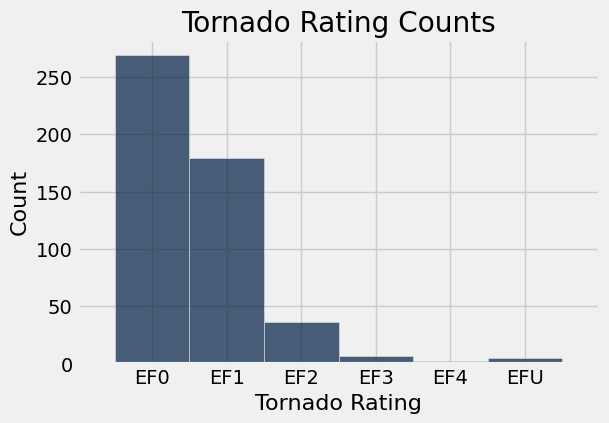

In [3]:
tor_data.group('Tornado Rating').relabeled('count', 'Count').bar('Tornado Rating') #getting counts for each tornado rating, relabeling the count column, and making a bar graph
plt.title('Tornado Rating Counts') #grouping and displaying tornado ratings

Unsurprisingly, the most common rating of tornadoes in Ohio are EF0s with EF1s being the next most common.

In [4]:
tor_data.group('Tornado Rating') #getting the table to see the actual counts for each rating

Tornado Rating,count
EF0,269
EF1,179
EF2,36
EF3,7
EF4,2
EFU,5


In [5]:
tor_data.group('CZ_NAME_STR').sort('count', descending=True).take(0,1,2,3,4).relabel('CZ_NAME_STR', 'County') #getting the top 5 counties with most tornadoes, relabeling to get better column names

County,count
VAN WERT CO.,21
MIAMI CO.,18
CLARK CO.,17
DARKE CO.,14
HURON CO.,14


These are the top five counties that have had the most tornadoes since 2007.

In [6]:
#making dates work so I can make a line plot for each year's total count of tornadoes.
date_column = tor_data.column('BEGIN_DATE')

date_column = [datetime.datetime.strptime(d, '%m/%d/%Y') for d in date_column]

day_column = [d.day for d in date_column]
month_column = [d.month for d in date_column]
year_column = [d.year for d in date_column]

tor_data = tor_data.with_columns(
    'Day', day_column,
    'Month', month_column,
    'Year', year_column)

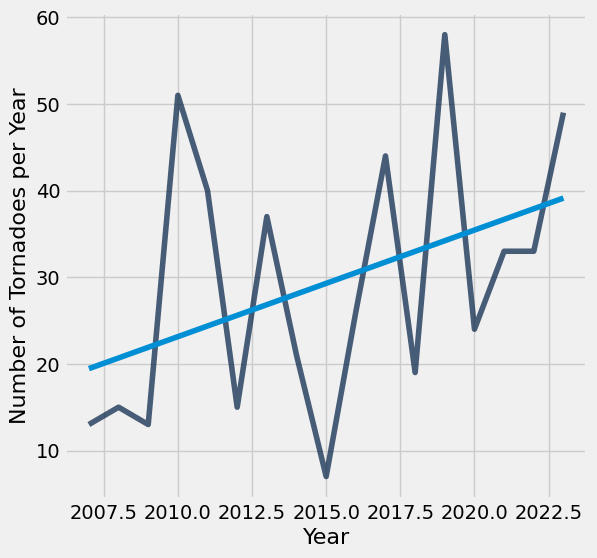

In [7]:
#making the lineplot with total tornadoes each year and adding a best fit line
tor_data.group('Year').relabel('count', 'Number of Tornadoes per Year'
            ).plot('Year', 'Number of Tornadoes per Year')
z = np.polyfit(tor_data.group('Year').column('Year'), tor_data.group('Year').column('count'), 1)
p = np.poly1d(z)
plt.plot(tor_data.group('Year').column('Year'), p(tor_data.group('Year').column('Year')))

There seems to be a slight upward trend in tornadoes in Ohio over the last 10-15 years with yearly fluctuations. However, this is a short period of data, less than the 30-year period that we tend to look at for climate, so this should be taken with a grain of salt.

In [8]:
tor_data.pivot('CZ_NAME_STR', 'Tornado Rating') #allows me to see each counties count of tornadoes per rating, hard to determine any county that has experienced the most strongest storms

Tornado Rating,ADAMS CO.,ALLEN CO.,ASHLAND CO.,ASHTABULA CO.,ATHENS CO.,AUGLAIZE CO.,BELMONT CO.,BROWN CO.,BUTLER CO.,CARROLL CO.,CHAMPAIGN CO.,CLARK CO.,CLERMONT CO.,CLINTON CO.,COLUMBIANA CO.,CRAWFORD CO.,CUYAHOGA CO.,DARKE CO.,DEFIANCE CO.,DELAWARE CO.,ERIE CO.,FAIRFIELD CO.,FAYETTE CO.,FRANKLIN CO.,FULTON CO.,GEAUGA CO.,GREENE CO.,GUERNSEY CO.,HAMILTON CO.,HANCOCK CO.,HARDIN CO.,HARRISON CO.,HENRY CO.,HIGHLAND CO.,HOCKING CO.,HOLMES CO.,HURON CO.,JACKSON CO.,JEFFERSON CO.,KNOX CO.,LAKE CO.,LAWRENCE CO.,LICKING CO.,LORAIN CO.,LUCAS CO.,MADISON CO.,MAHONING CO.,MARION CO.,MEDINA CO.,MEIGS CO.,MERCER CO.,MIAMI CO.,MONTGOMERY CO.,MORGAN CO.,MORROW CO.,MUSKINGUM CO.,OTTAWA CO.,PAULDING CO.,PERRY CO.,PICKAWAY CO.,PIKE CO.,PORTAGE CO.,PREBLE CO.,PUTNAM CO.,RICHLAND CO.,ROSS CO.,SANDUSKY CO.,SCIOTO CO.,SENECA CO.,SHELBY CO.,STARK CO.,SUMMIT CO.,TRUMBULL CO.,TUSCARAWAS CO.,UNION CO.,VAN WERT CO.,VINTON CO.,WARREN CO.,WASHINGTON CO.,WAYNE CO.,WOOD CO.,WYANDOT CO.
EF0,2,7,3,1,1,7,0,8,3,3,3,10,6,10,4,2,0,8,2,5,0,7,6,6,0,1,5,2,5,1,2,0,6,6,0,1,6,1,0,0,0,0,4,3,2,4,1,1,3,1,5,13,4,1,1,1,1,1,1,4,6,4,5,3,2,5,5,3,3,2,4,4,3,2,1,12,2,5,2,1,3,1
EF1,3,1,3,2,1,3,2,5,2,3,0,6,4,0,2,1,2,6,1,0,1,3,1,3,1,3,4,0,0,0,2,0,3,4,1,3,7,0,4,1,1,1,2,2,3,1,1,1,5,1,0,3,5,0,3,4,1,3,2,5,5,1,2,2,2,1,2,0,2,0,2,2,5,3,0,6,4,1,0,4,3,0
EF2,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,2,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,2,0,1,0,0,0,0,0,1,0,2,0,0,0,0,0,4,1,2,0,0,0,1,1,1,0,0,0,0,1,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
EF3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
EF4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
EFU,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0


In [9]:
time_calc = tor_data.select('CZ_NAME_STR', 'BEGIN_TIME', 'END_TIME') #simplifying table

In [10]:
#calculating durations of each tornado
from datetime import datetime, timedelta
def duration_calc(start_time, end_time):
    time_format = '%H%M'
    start_time = datetime.strptime(str(start_time).zfill(4), time_format)
    end_time = datetime.strptime(str(end_time).zfill(4), time_format)
    
    if end_time < start_time:
        end_time += timedelta(days=1)
        
    duration = end_time - start_time
    return duration

time_calc = time_calc.with_columns('Duration', time_calc.apply(duration_calc, 'BEGIN_TIME', 'END_TIME')) #applying the function created above

In [11]:
time_calc.sort('Duration', descending = True).take(range(0,5)) #getting the top 5 longest tornadoes

CZ_NAME_STR,BEGIN_TIME,END_TIME,Duration
MONTGOMERY CO.,2141,2213,0:32:00
WARREN CO.,203,231,0:28:00
CLARK CO.,1723,1751,0:28:00
MIAMI CO.,1653,1716,0:23:00
STARK CO.,2310,2330,0:20:00


These are the top 5 counties with the longest tornadoes.

In [12]:
#calculating the state tornado duration mean
state_duration_mean = np.mean(time_calc.column('Duration'))
state_duration_mean

datetime.timedelta(seconds=250, microseconds=722892)

In [13]:
#making the above value make more sense
state_duration_mean_minutes = 250/60
state_duration_mean_minutes

4.166666666666667

The average tornado duration is 4 minutes (units are given in data documentation: https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/Storm-Data-Bulk-csv-Format.pdf.

In [14]:
#creating and sorting table to see the longest tornadoes
tor_length = tor_data.sort('TOR_LENGTH', descending = True).select('CZ_NAME_STR', 'TOR_LENGTH')
tor_length

CZ_NAME_STR,TOR_LENGTH
WARREN CO.,20.7
MONTGOMERY CO.,18.17
RICHLAND CO.,17
CLARK CO.,16.92
STARK CO.,14.49
HIGHLAND CO.,14.16
MIAMI CO.,13.75
MIAMI CO.,12.78
TRUMBULL CO.,12.27
WAYNE CO.,11.47


The distance is in miles to the nearest tenth of a mile. So the longest tornado was in Warren County.

In [15]:
#determining the average state tornado length
state_average_tornado_length = np.mean(tor_length.column('TOR_LENGTH'))
state_average_tornado_length

2.5530923694779113

This is also in miles based on the data documentation (https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/Storm-Data-Bulk-csv-Format.pdf). So the average distance traveled by a tornado in Ohio is 2.5 miles.

In [16]:
time_calc = time_calc.with_column("Duration_num", time_calc.apply(lambda x: x.total_seconds(), 'Duration'))

In [17]:
#seeing if there is any correlation between tornado width and duration
r_width_duration = np.corrcoef(tor_data.column('TOR_WIDTH'), 
                        time_calc.column('Duration_num'))
r_width_duration[0,1]

0.42094967746022982

Based on this value there is a weak positive correlation between the width and duration of a tornado.

In [18]:
#seeing if there is any correlation between tornado length and duration
r_length_duration = np.corrcoef(tor_data.column('TOR_LENGTH'), 
                        time_calc.column('Duration_num'))
r_length_duration[0,1]

0.87273324483614134

Based on this value there is a pretty strong positive correlation between length the tornado traveled and its duration, which makes sense because a tornado would be able to travel longer if it was on the ground longer.

In [53]:
#function that will allow us to calculate the difference between points to help with our classify function
def distance(arr1, arr2):
    squared_dif = make_array()
    for i in range(len(arr1)):
        value = (arr1[i]-arr2[i]) ** 2
        squared_dif = np.append(squared_dif, value)
        return np.sqrt(sum(squared_dif))

#shuffling and and splitting our data into a train and test set
tor_short = tor_data.select('CZ_NAME_STR', 'Tornado Rating', 'DAMAGE_PROPERTY_NUM', 'TOR_LENGTH', 'TOR_WIDTH')
tor_short_shuffled = tor_short.shuffle()
tor_train = tor_short_shuffled.take(range(0, 400))
tor_test = tor_short_shuffled.take(range(400, 498))

#the features that I want to use to try and use to determine if they can predict the the rating
features = make_array('DAMAGE_PROPERTY_NUM', 'TOR_LENGTH', 'TOR_WIDTH')

#turning each row in the column into an array for classification function
def row_to_array(row, features):
    arr = make_array()
    for features in features:
        arr = np.append(arr, row.item(features))
    return arr

#classification function using distance between features in the training set
def classify(row, k, tor_train):
    test_row_features_array = row_to_array(row, features)
    distances = make_array()
    for train_row in tor_train.rows:
        train_row_features_array = row_to_array(train_row, features)
        row_distance = distance(train_row_features_array, test_row_features_array)
        distances = np.append(distances, row_distance)
    tor_train_with_distances = tor_train.with_column('Distance', distances)
    nearest_neighbors = tor_train_with_distances.sort('Distance', descending=False).take(range(0,k))
    most_common_label = max(nearest_neighbors.column('Tornado Rating'))
    return str(most_common_label)

#setting k=11 to determine to classify all rows in the train set
def eleven_classify(row):
    return classify(row, 11, tor_train)

#adding the guesses/predictions to the test table
tor_test_with_guess = tor_test.with_column('Prediction', tor_test.apply(eleven_classify))  
tor_test_with_guess

#determining the accuracy of this machine learning classification model
label_correct = tor_test_with_guess.where('Tornado Rating', 'Prediction').num_rows
label_correct
tor_test.num_rows
accuracy = label_correct / tor_test.num_rows
accuracy

0.0

As we can see from the model I ran we cannot use property damage cost, tornado length, and width to try and predict EF rating. This honestly makes sense since it is so subjective to the NWS employees out performing the damage surveys. Furthermore, they have to consider the construction quality of the house, so even if it was flattened, poor construction will still result in the EF rating being lower. 